In [ ]:
pip install openpyxl


In [2]:
import pandas as pd

# Load the Excel file
file_path = "C:/Users/rvann/Downloads/Average Feature Matrices.xlsx"

# Get all sheet names
xlsx = pd.ExcelFile(file_path)
sheet_names = xlsx.sheet_names

# Initialize a list to store dataframes
dataframes = []

# Loop through each sheet and load the data
for sheet in sheet_names:
    day_df = pd.read_excel(file_path, sheet_name=sheet)
    day_df['Day'] = sheet  # Assuming each sheet name represents a day
    dataframes.append(day_df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)


In [3]:
# Check for and handle missing values
combined_df.dropna(inplace=True)

In [4]:
combined_df.head()

,Unnamed: 0,spectrum_0 + 740,spectrum_1 + 740,spectrum_2 + 740,spectrum_3 + 740,spectrum_4 + 740,spectrum_5 + 740,spectrum_6 + 740,spectrum_7 + 740,spectrum_8 + 740,...,spectrum_322 + 740,spectrum_323 + 740,spectrum_324 + 740,spectrum_325 + 740,spectrum_326 + 740,spectrum_327 + 740,spectrum_328 + 740,spectrum_329 + 740,spectrum_330 + 740,Day
0,59,0.650006,0.655503,0.661014,0.666694,0.672546,0.678426,0.684039,0.689209,0.693903,...,0.656142,0.656778,0.657349,0.657887,0.658512,0.659069,0.659503,0.659791,0.660032,Day1
1,58,0.741974,0.747911,0.753874,0.760039,0.766409,0.772821,0.778946,0.784583,0.789691,...,0.737399,0.738108,0.738746,0.739347,0.740047,0.740673,0.741159,0.741482,0.741753,Day1
2,57,0.671390,0.677008,0.682704,0.688632,0.694791,0.701033,0.707052,0.712656,0.717796,...,0.699953,0.700624,0.701227,0.701794,0.702457,0.703048,0.703507,0.703812,0.704067,Day1
3,56,0.719652,0.726495,0.733338,0.740346,0.747521,0.754697,0.761538,0.767845,0.773584,...,0.736716,0.737434,0.738080,0.738688,0.739393,0.740023,0.740513,0.740840,0.741113,Day1
4,55,0.652246,0.658557,0.664937,0.671539,0.678360,0.685244,0.691875,0.698054,0.703736,...,0.699298,0.699994,0.700620,0.701207,0.701886,0.702492,0.702964,0.703280,0.703544,Day1


In [5]:
# Select spectral data columns
spectral_columns = [col for col in combined_df.columns if 'spectrum' in col]
spectral_data = combined_df[spectral_columns]


In [ ]:
pip install scikit-learn


In [ ]:
pip install scikit-learn


In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn


In [6]:
from sklearn.preprocessing import StandardScaler

# Standardize the spectral data
scaler = StandardScaler()
scaled_spectral_data = scaler.fit_transform(spectral_data)

In [7]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(scaled_spectral_data)

# Create a dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Day'] = combined_df['Day']

In [11]:
# Ensure the 'Day' column is of string type and then extract numeric values
combined_df['Day'] = combined_df['Day'].astype(str).str.extract(r'(\d+)').astype(int)


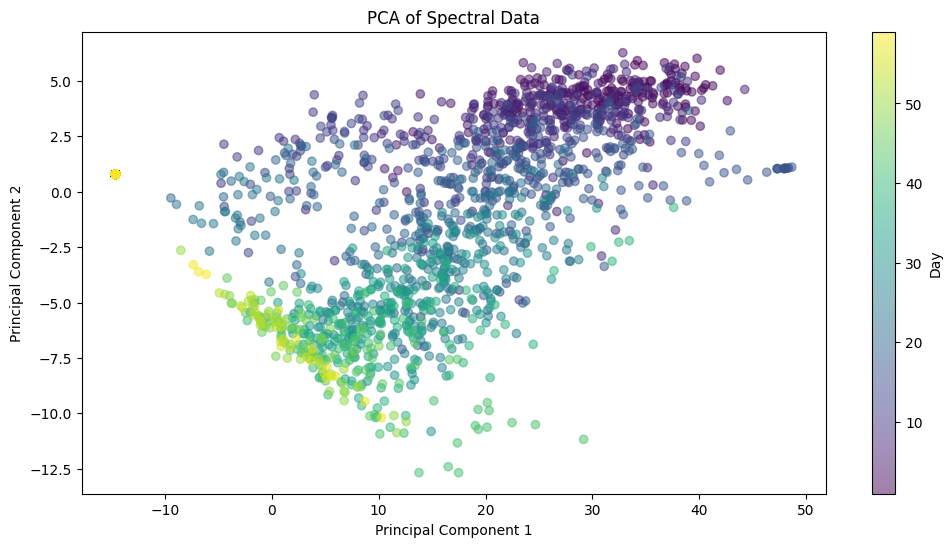

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=combined_df['Day'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Day')
plt.title('PCA of Spectral Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [13]:
import numpy as np

L = 59  # Maximum shelf life

# Initialize matrices
A = {n: combined_df[combined_df['Day'] == n][spectral_columns].values for n in range(1, L+1)}
K = len(spectral_columns)

# Calculate the mean matrix
def calculate_mean_matrix(A, L, K):
    mean_matrix = {}
    for n in range(1, L+1):
        mean_matrix[n] = np.mean(A[n], axis=0)
    return mean_matrix

mean_matrix = calculate_mean_matrix(A, L, K)

# Calculate S matrices
def calculate_S_matrices(A, mean_matrix, L, K):
    S = {}
    for n in range(1, L+1):
        S[n] = np.zeros((K, K))
        for k in range(K):
            for m in range(K):
                S[n][k, m] = np.sum((A[n][:, k] - mean_matrix[n][k]) * (A[n][:, m] - mean_matrix[n][m]))
    return S

S = calculate_S_matrices(A, mean_matrix, L, K)

# Calculate Pearson's coefficients R
def calculate_Pearsons_coefficients(S, L, K):
    R = {}
    for n in range(1, L+1):
        R[n] = np.zeros((K, K))
        for k in range(K):
            for m in range(K):
                R[n][k, m] = S[n][k, m] / (np.sqrt(S[n][k, k]) * np.sqrt(S[n][m, m]))
    return R

R = calculate_Pearsons_coefficients(S, L, K)

# Display the correlation matrix for a specific day
print(R[1])  # Example: Display the correlation matrix for Day 1

[[1.         0.99999713 0.99998859 ... 0.99624445 0.99624579 0.9962469 ]
 [0.99999713 1.         0.99999716 ... 0.99632924 0.99633067 0.99633185]
 [0.99998859 0.99999716 1.         ... 0.99641183 0.99641334 0.9964146 ]
 ...
 [0.99624445 0.99632924 0.99641183 ... 1.         1.         0.99999999]
 [0.99624579 0.99633067 0.99641334 ... 1.         1.         1.        ]
 [0.9962469  0.99633185 0.9964146  ... 0.99999999 1.         1.        ]]


In [15]:
#verification
# Check matrix dimensions
print("Matrix dimensions:", R[1].shape)  # Should be (K, K)

# Verify diagonal elements
diagonal_correct = np.allclose(np.diag(R[1]), 1.0)
print("Diagonal elements are 1:", diagonal_correct)  # Should be True

# Inspect a few off-diagonal elements
print("Sample off-diagonal elements:")
print(R[1][0, 1])  # Example: correlation between the first and second spectral columns
print(R[1][0, 2])  # Example: correlation between the first and third spectral columns


Matrix dimensions: (331, 331)
Diagonal elements are 1: True
Sample off-diagonal elements:
0.999997126683433
0.9999885908005971


In [14]:
# Initialize matrices
def calculate_R2_coefficients(A, mean_matrix, L, K):
    R2 = {}
    for n in range(1, L+1):
        R2[n] = np.zeros((L, L))
        for l in range(1, L+1):
            for h in range(1, L+1):
                numerator = np.sum((A[n][:, l-1] - mean_matrix[n][l-1]) * (A[n][:, h-1] - mean_matrix[n][h-1]))
                denominator = np.sqrt(np.sum((A[n][:, l-1] - mean_matrix[n][l-1])**2) * np.sum((A[n][:, h-1] - mean_matrix[n][h-1])**2))
                R2[n][l-1, h-1] = numerator / denominator
    return R2

R2 = calculate_R2_coefficients(A, mean_matrix, L, K)

# Display the correlation matrix for a specific day
print(R2[1])  # Example: Display the correlation matrix for Day 1


[[1.         0.99999713 0.99998859 ... 0.99895109 0.99893809 0.998925  ]
 [0.99999713 1.         0.99999716 ... 0.99904222 0.99902956 0.99901681]
 [0.99998859 0.99999716 1.         ... 0.99912959 0.99911729 0.99910489]
 ...
 [0.99895109 0.99904222 0.99912959 ... 1.         0.99999992 0.9999997 ]
 [0.99893809 0.99902956 0.99911729 ... 0.99999992 1.         0.99999992]
 [0.998925   0.99901681 0.99910489 ... 0.9999997  0.99999992 1.        ]]


Matrix dimensions: (331, 331)
Diagonal elements are 1: True
Sample off-diagonal elements:
0.999997126683433
0.9999885908005971
